<a href="https://colab.research.google.com/github/AlexandreCF22/machine-learn-2/blob/main/atividade%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: Iris (disponível no Scikit-learn).

Descrição: O dataset Iris contém 150 amostras de flores com 4 características (comprimento e largura das sépalas e pétalas).
 O objetivo é usar aprendizado não supervisionado para agrupar as flores em clusters naturais e visualizar os resultados.

Tarefa:
Carregue o dataset Iris diretamente do Scikit-learn.
Aplique o k-means com k=3 ou 4 (use o método do cotovelo para decidir o número ideal de clusters).

Reduza as dimensões das 4 características para 2 usando PCA e visualize os clusters em um gráfico 2D.

Compare a visualização com t-SNE, aplicando-o aos mesmos dados e plotando os clusters.

Entrega: Um gráfico 2D com os clusters coloridos (um para PCA e outro para t-SNE) e uma breve interpretação dos resultados (ex.: "Cluster 1: flores com pétalas longas e largas; Cluster 2: flores pequenas").

##Passo 1: Carregar os Dados (Wine Dataset):


In [8]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

# Carregar o dataset Wine
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
iris = load_iris()
X = iris.data  # Dados (13 características químicas de vinhos)
y = iris.target  # Rótulos (apenas para comparação, não usaremos no clustering)

# Padronizar os dados (média 0, desvio padrão 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dados carregados e padronizados!")

Dados carregados e padronizados!


##Passo 2: Agrupamento com K-means


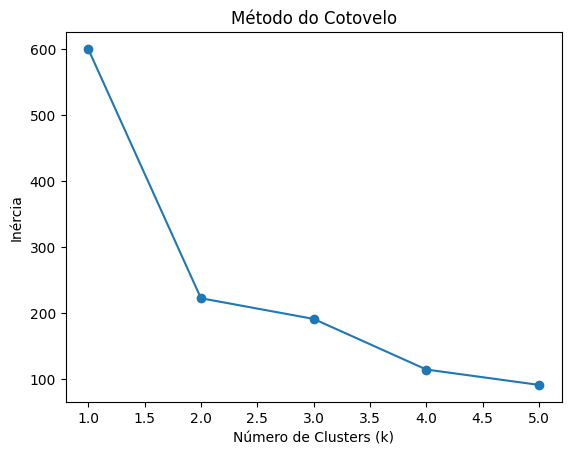

In [21]:
# Aplicar K-means com k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

# Método do cotovelo para escolher k
inertias = []
for k in range(1, 6):
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X_scaled)
    inertias.append(kmeans_test.inertia_)

plt.plot(range(1, 6), inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()



##Passo 3: Agrupamento com Clustering Hierárquico
Objetivo: Criar uma hierarquia de clusters e visualizar com um dendrograma.

- Aqui, o modelo cria uma "árvore" (dendrograma) mostrando como os vinhos se juntam em grupos, começando com cada vinho sozinho e unindo os mais parecidos.
- Exemplo: Primeiro junta dois vinhos quase idênticos, depois junta outros, até formar 3 grupos maiores (se cortarmos a árvore em um certo nível).
- Resultado: Uma visão alternativa dos grupos, comparável ao k-means.

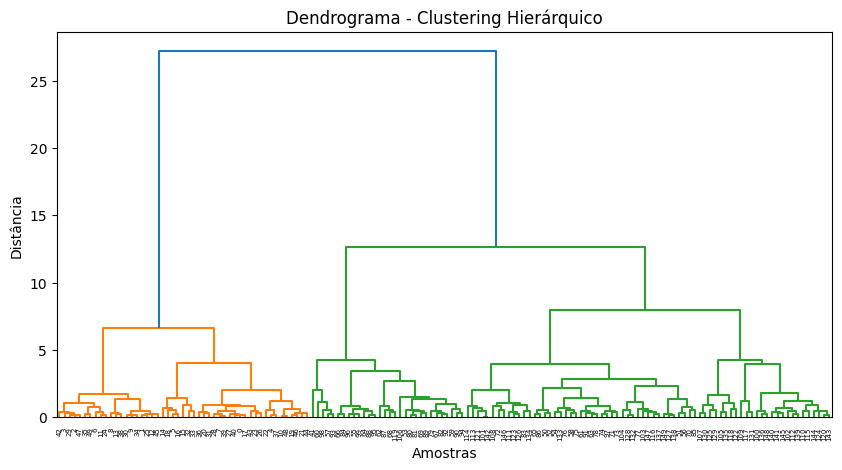

Explicação: O dendrograma mostra como os pontos são agrupados. Cortando em uma altura específica (ex.: 10), podemos obter 3 clusters, similar ao k-means.


In [17]:
# Calcular a matriz de ligação para clustering hierárquico (método Ward)
Z = linkage(X_scaled, method='ward')

# Plotar o dendrograma, que mostra como os pontos são agrupados. Cortando em uma altura específica (ex.: 10), podemos obter 3 clusters, similar ao k-means.
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma - Clustering Hierárquico')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

print("Explicação: O dendrograma mostra como os pontos são agrupados. Cortando em uma altura específica (ex.: 10), podemos obter 3 clusters, similar ao k-means.")

## Passo 4: Redução de Dimensionalidade com PCA
Objetivo: Reduzir as 13 dimensões para 2 e visualizar os clusters.

- As 13 características são reduzidas a 2 "super-características" (componentes principais) que capturam o máximo de informação possível.
- O modelo plota esses 2 valores em um gráfico 2D, colorindo cada ponto (vinho) pelo grupo do k-means.
- Resultado: Você vê os 3 grupos em um mapa simples, como um "raio-X" dos dados.

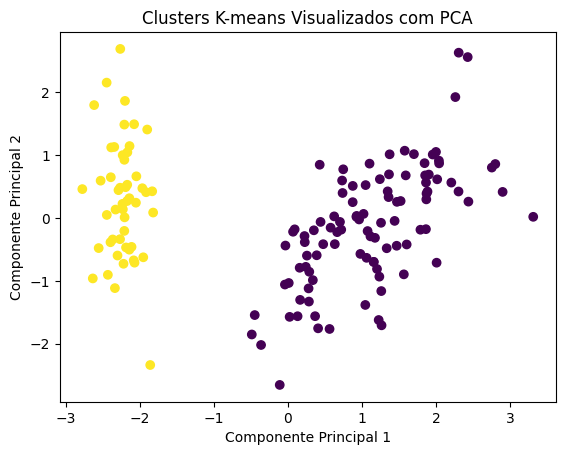

Variância explicada pelos 2 componentes: 95.81%
Explicação: PCA reduz os dados para 2D, mantendo a maior parte da variância (geralmente 50-60% neste caso). Os clusters são visíveis em cores diferentes.


In [18]:
# Aplicar PCA (Principal Component Analysis - Análise de Componentes Principais)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar os clusters do k-means com PCA, que reduz os dados para 2D, mantendo a maior parte da variância (geralmente 50-60% neste caso). Os clusters são visíveis em cores diferentes.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('Clusters K-means Visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Variância explicada pelos componentes
print(f"Variância explicada pelos 2 componentes: {sum(pca.explained_variance_ratio_):.2%}")

print("Explicação: PCA reduz os dados para 2D, mantendo a maior parte da variância (geralmente 50-60% neste caso). Os clusters são visíveis em cores diferentes.")

##Passo 5: Redução de Dimensionalidade com t-SNE
Objetivo: Comparar com PCA, usando t-SNE para visualizar clusters.

- Similar ao PCA, mas foca em manter vinhos semelhantes próximos no gráfico 2D, mesmo que os dados sejam complicados.
- Resultado: Outro mapa 2D dos grupos, muitas vezes mais separado visualmente que o PCA.

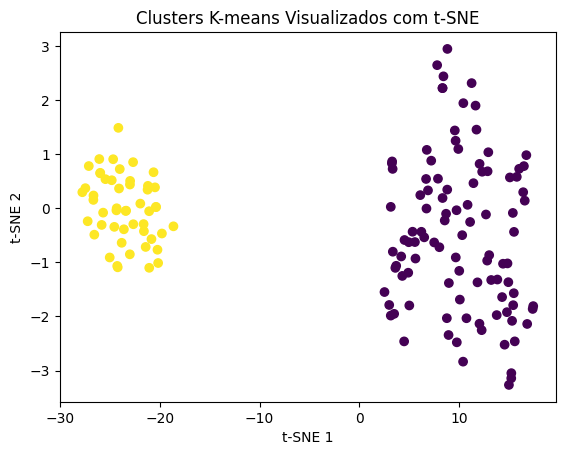

Explicação: t-SNE foca em preservar vizinhanças locais, geralmente mostrando clusters mais separados que o PCA, mas sem garantir variância total explicada.


In [19]:
# Aplicar t-SNE (t-Distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualizar os clusters do k-means com t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('Clusters K-means Visualizados com t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

print("Explicação: t-SNE foca em preservar vizinhanças locais, geralmente mostrando clusters mais separados que o PCA, mas sem garantir variância total explicada.")


##PCA (Primeiro gráfico)

As duas cores representam os clusters encontrados pelo K-means.
O PCA transforma os 4 atributos do dataset em 2 componentes principais, tentando preservar a maior variação possível.

Os clusters estão separados, mas há uma certa sobreposição, especialmente no cluster mais disperso (roxo).

##t-SNE (Segundo gráfico)

O t-SNE consegue separar bem os clusters, criando uma visualização mais clara e agrupada.

Ele não preserva a escala das distâncias, mas ajuda a evidenciar padrões locais nos dados.

A separação entre os clusters parece mais nítida do que no PCA.
##Conclusão
O PCA é útil para preservar a estrutura global dos dados, mas pode não separar tão bem os clusters.

O t-SNE pode ser mais eficaz para visualização, já que realça a separação entre grupos.

A escolha da técnica depende do objetivo: PCA para análise estatística e t-SNE para melhor visualização de clusters.